In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('../data/breast-cancer-final.csv', index_col=[0])

In [23]:
cat_attr = ['age', 'tumor-size', 'inv-nodes', 'menopause', 'node-caps', 'breast', 'breast-quad', 'def-malig', 'irradiat']

## Data Encoding

In [49]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

df_encoded = encoder.fit_transform(df)
df_encoded = pd.DataFrame(df_encoded, columns=df.columns.tolist())


In [35]:
df.to_csv('../data/breast-cancer-encoded.csv')

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

## Tackle imbalanced dataset

In [28]:
df = pd.read_csv('../data/breast-cancer-encoded.csv')

<AxesSubplot:xlabel='class', ylabel='count'>

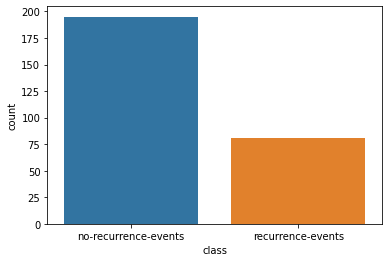

In [29]:
sns.countplot(data=df, x='class')

## Use SMOTE 
- Identify the feature vector and its nearest neighbor
- Take the difference between the two
- Multiply the difference with a random number between 0 and 1
- Identify a new point on the line segment by adding the random number to feature vector
- Repeat the process for identified feature vectors

In [54]:
from sklearn.model_selection import train_test_split

x = df_encoded.iloc[:, 1:]
y = df_encoded['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [55]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

## Evaluation
### This is evaluation before using SMOTE

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[49  6]
 [20  8]]
              precision    recall  f1-score   support

         0.0       0.71      0.89      0.79        55
         1.0       0.57      0.29      0.38        28

    accuracy                           0.69        83
   macro avg       0.64      0.59      0.59        83
weighted avg       0.66      0.69      0.65        83



c:\Users\Admin\Desktop\python\projects\breast-cancer-analysis\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


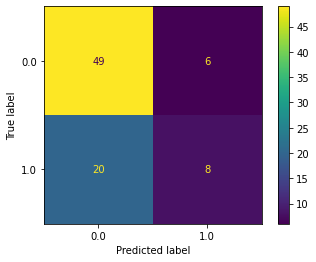

In [58]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, x_test, y_test)
plt.show()

In [59]:

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x_train, y_train)

In [61]:
clf1 = LogisticRegression()
clf1.fit(x_res, y_res)
y_pred1 = clf1.predict(x_test)

In [65]:
print('Before using SMOTE')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('After using SMOTE')
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

Before using SMOTE
[[49  6]
 [20  8]]
              precision    recall  f1-score   support

         0.0       0.71      0.89      0.79        55
         1.0       0.57      0.29      0.38        28

    accuracy                           0.69        83
   macro avg       0.64      0.59      0.59        83
weighted avg       0.66      0.69      0.65        83

After using SMOTE
[[38 17]
 [12 16]]
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72        55
         1.0       0.48      0.57      0.52        28

    accuracy                           0.65        83
   macro avg       0.62      0.63      0.62        83
weighted avg       0.67      0.65      0.66        83



c:\Users\Admin\Desktop\python\projects\breast-cancer-analysis\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Admin\Desktop\python\projects\breast-cancer-analysis\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


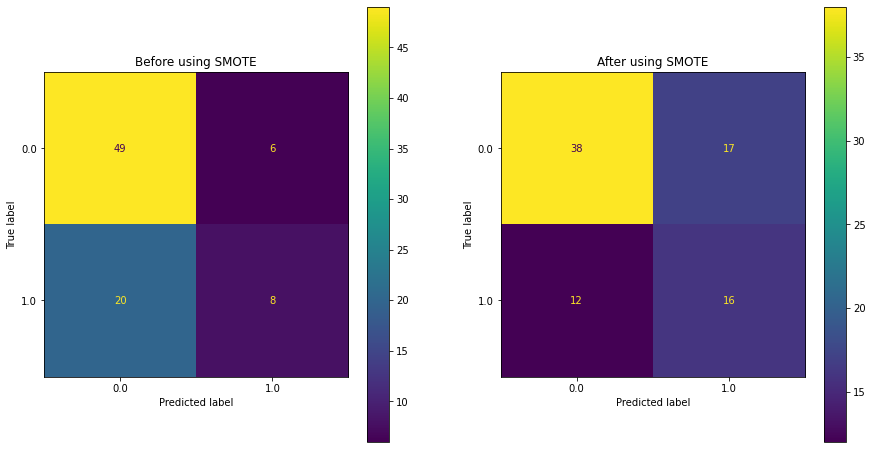

In [70]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,8))

plot_confusion_matrix(clf, x_test, y_test, ax=ax1)
ax1.set_title('Before using SMOTE')
plot_confusion_matrix(clf1, x_test, y_test, ax=ax2)
ax2.set_title('After using SMOTE')
plt.show()